# Supervised Learning - Foundations Project: ReCell 

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np

# for visualizing data
import matplotlib.pyplot as plt
import seaborn as sns

# For randomized data splitting
from sklearn.model_selection import train_test_split

# To build linear regression_model
import statsmodels.api as sm

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Loading the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

#Loading data into a dataframe
cData = pd.read_csv('/content/drive/MyDrive/Study/MDS_UTexas/3_SupervisedLearningFoundations/Project3/used_device_data.csv')

Mounted at /content/drive


## Data Overview

- Observations
- Sanity checks

In [3]:
# let's check the first 5 rows of the data
cData.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [ ]:
# checking shape of the data
print("There are", cData.shape[0], 'rows and', cData.shape[1], "columns.")
print(cData.shape)

There are 3454 rows and 15 columns.
(3454, 15)


In [ ]:
# let's check column types and number of values
cData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

**Observations:**

*   All columns seems to have the right data type Dtype as per the expected type based in the top 5 columns
*   Main camera, selfie_camera_mp, int_memory, ram, battery and weight are the colums with missing/null values
*   Missing/null values will be treated later on.





In [ ]:
cData.describe()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
count,3454.000000,3275.000000,3452.000000,3450.000000,3450.000000,3448.000000,3447.000000,3454.000000,3454.000000,3454.000000,3454.000000
mean,13.713115,9.460208,6.554229,54.573099,4.036122,3133.402697,182.751871,2015.965258,674.869716,4.364712,5.233107
std,3.805280,4.815461,6.970372,84.972371,1.365105,1299.682844,88.413228,2.298455,248.580166,0.588914,0.683637
min,5.080000,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,1.536867,2.901422
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,2014.000000,533.500000,4.033931,4.790342
50%,12.830000,8.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,2015.500000,690.500000,4.405133,5.245892
75%,15.340000,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,868.750000,4.755700,5.673718
max,30.710000,48.000000,32.000000,1024.000000,12.000000,9720.000000,855.000000,2020.000000,1094.000000,6.619433,7.847841


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

**Observations: --> ANSWERs to questions**

**1. What does the distribution of normalized used device prices look like?**
It looks simetrically and normally distributed with a several outliers at the left tail and a few outliers at the right tail. It has a median close to 4.5

**2. What percentage of the used device market is dominated by Android devices?**
93% of the market is using Android devices as per the provided data

**3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?**
The range varies from 0.2GB up to 12GBs in general terms. Some of the brands have a wide range. Microsoft,Panasonic and XOLO doesnt seem to vary from 4GB. Motorola,Xiaomi, Oppo, Huawei and Samsung have a wider range froma bout 4GBs up to 12GBs. The rest of brands have a moderate variation between 4 to 8 GBs between the minimum and maximum value.

**4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?**
It ranges from a minimum close to 120, a max of about 880 and a median of 300. 

**5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?**
We can find in total 1099 devices accross different brands. A count by brand can be found below.

**6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?**

Right skewed normal distribution with a median of 17mp

**7. Which attributes are highly correlated with the normalized price of a used device?**

Normalized_new_price, battery, selfie_camera_mp, screen_size all of them with more than 0.61 correlation coefficient


## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

<ipython-input-299-80e345e0e083>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x = 'brand_name', y = 'ram', data = cData,


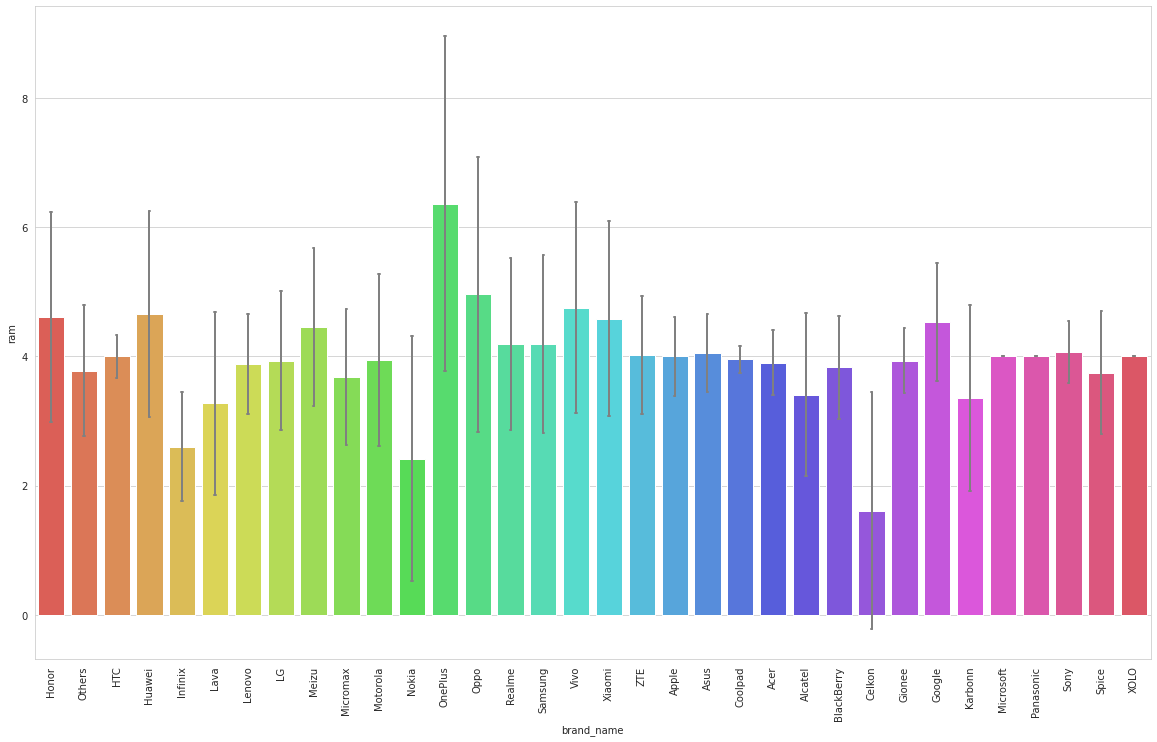

In [ ]:
#how RAM vary by brand
plt.figure(figsize=(20,12));

sns.barplot(x = 'brand_name', y = 'ram', data = cData,
            palette = 'hls',        
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,  
            ci = 'sd'   
            )
plt.xticks(rotation=90)
plt.show();

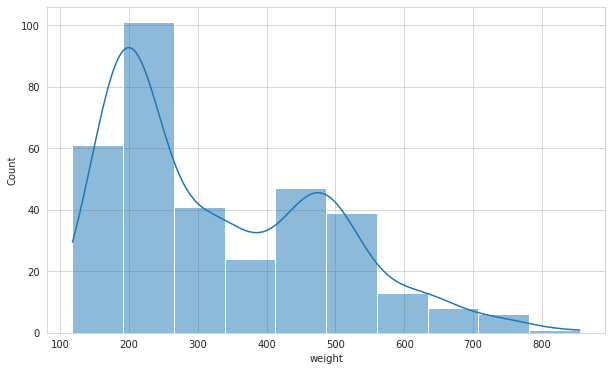

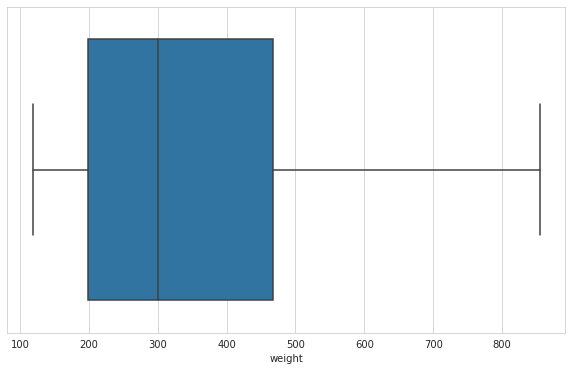

In [ ]:
#Battery checks. Getting population with more than 4500 mAh
cData_4500=cData[cData["battery"]>4500]

#ploting a histogram
plt.figure(figsize=(10,6));
sns.histplot(data=cData_4500, x='weight', kde=True);
plt.show();
print("\n\n")

#plotting weight distribution for tablets and phones with more than 4500 mAh
plt.figure(figsize=(10,6));
sns.boxplot(data=cData_4500, x='weight');
plt.show();

In [ ]:
#getting devices with more than 6inches. We have to take into account that screen_size is provided in cm
cData_screen6=cData[cData["screen_size"]>(6*2.54)]

#getting count per brand
cData_screen6.groupby(['brand_name'])['screen_size'].aggregate(['count']).reset_index().sort_values('count', ascending=False)

,brand_name,count
9,Huawei,149
24,Samsung,119
21,Others,99
27,Vivo,80
8,Honor,72
20,Oppo,70
29,Xiaomi,69
13,Lenovo,69
12,LG,59
17,Motorola,42


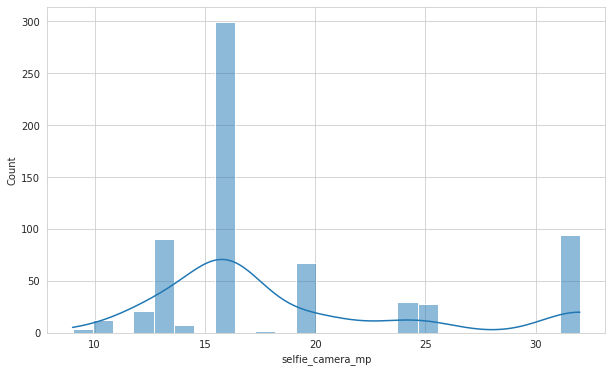

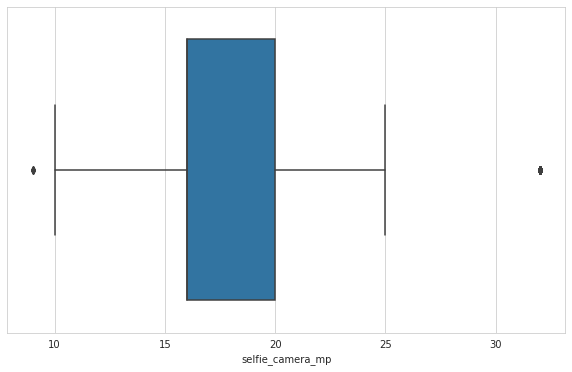

,brand_name,count
9,Huawei,149
24,Samsung,119
21,Others,99
27,Vivo,80
8,Honor,72
20,Oppo,70
29,Xiaomi,69
13,Lenovo,69
12,LG,59
17,Motorola,42


In [ ]:
#getting devices with more than 6inches. We have to take into account that screen_size is provided in cm
cData_selfie=cData[cData["selfie_camera_mp"]>8]

#ploting a histogram
plt.figure(figsize=(10,6));
sns.histplot(data=cData_selfie, x='selfie_camera_mp', kde=True);
plt.show();
print("\n\n")

#plotting weight distribution for tablets and phones with more than 4500 mAh
plt.figure(figsize=(10,6));
sns.boxplot(data=cData_selfie, x='selfie_camera_mp');
plt.show();

#getting count per brand
cData_screen6.groupby(['brand_name'])['selfie_camera_mp'].aggregate(['count']).reset_index().sort_values('count', ascending=False)

In [ ]:
#checking colums with null values
cData.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [ ]:
cData.groupby(['brand_name'])[['main_camera_mp','selfie_camera_mp','int_memory','ram','battery','weight']].median()

,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight
brand_name,,,,,,
Acer,5.00,2.0,16.0,4.00,2700.0,155.00
Alcatel,5.00,1.3,16.0,4.00,2500.0,149.00
Apple,12.00,7.0,32.0,4.00,3937.0,299.00
Asus,13.00,5.0,32.0,4.00,3300.0,170.00
BlackBerry,8.00,2.0,32.0,4.00,2840.0,167.50
Celkon,3.15,0.3,256.0,0.25,1400.0,140.00
Coolpad,13.00,8.0,32.0,4.00,2650.0,155.00
Gionee,8.00,5.0,32.0,4.00,3000.0,151.50
Google,12.20,8.0,64.0,4.00,3430.0,167.00


In [ ]:
#since all columns(except days of use) have shown outliers presence we will replace missign values with the median
# imputing missing values for all colums with na values 'main_camera_mp','selfie_camera_mp','int_memory','ram','battery','weight'
cData['main_camera_mp'] = cData['main_camera_mp'].fillna(value = cData.groupby(['brand_name'])['main_camera_mp'].transform('median'))
cData['selfie_camera_mp'] = cData['selfie_camera_mp'].fillna(value = cData.groupby(['brand_name'])['selfie_camera_mp'].transform('median'))
cData['int_memory'] = cData['int_memory'].fillna(value = cData.groupby(['brand_name'])['int_memory'].transform('median'))
cData['ram'] = cData['ram'].fillna(value = cData.groupby(['brand_name'])['ram'].transform('median'))
cData['battery'] = cData['battery'].fillna(value = cData.groupby(['brand_name'])['battery'].transform('median'))
cData['weight'] = cData['weight'].fillna(value = cData.groupby(['brand_name'])['weight'].transform('median'))
#at last 10 row still remain with na value for main_camera_mp, they were updated using the median by relase year
cData['main_camera_mp'] = cData['main_camera_mp'].fillna(value = cData.groupby(['release_year'])['main_camera_mp'].transform('median'))

In [ ]:
#checking colums with null values again
cData.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

**Observations:**

We can observe that no null values are present anymore and all of them have been replaced with median values

**Feature engineering**

In [ ]:
#replacing yes and no values with 1 and 0 respectively for prediction purposes of the model
cData['4g'] = cData['4g'].replace(['yes'],1)
cData['4g'] = cData['4g'].replace(['no'],0)
cData['5g'] = cData['5g'].replace(['yes'],1)
cData['5g'] = cData['5g'].replace(['no'],0)

#getting dummy variables for OS
cData = pd.get_dummies(cData, columns=["os"], drop_first=True)
cData.head()

,brand_name,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price,os_Others,os_Windows,os_iOS
0,Honor,14.50,1,0,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100,0,0,0
1,Honor,17.30,1,1,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018,0,0,0
2,Honor,16.69,1,1,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631,0,0,0
3,Honor,25.50,1,1,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961,0,0,0
4,Honor,15.32,1,0,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837,0,0,0


**Outliers treatment:**

**screen_size:** having min values of 5 and max values of 30 we will assume that those values are not outliers, since phones can have a 5cm screen if they are feature phones that min value migh be real, on the other hand a table could have 30 cms if it is a big one.

**main_camera_mp:** outliers max values are close to 50mp which might be considered a real value, so well keep this field as it is.

**selfie_camera_mp:** outliers max values are close to 30mp which might be considered a real value, so well keep this field as it is.

**int_memory:** about 1TB of storage currently can be a real value. For instance Samsung Galaxy S10+ Factory Unlocked Android Cell Phone has 1TB of Storage, so we will leave this field as it is.

**ram:** Having a min value close to 0 and max value up to 12 we could consider those limit values as genuines since feature phones might have very low ram memory, and most advanced smartphones could have even more than 12GB of ram.

**battery:** currently we could have phones with more than 10,000 mAh so we can consider extreme values as genuine for this field.

**weight:** the heaviest tablet weight up to 730grams, so I would assume that any table heavier than that is an outlier.

**`days_used:`** it doesn't seems to have outliers

In [ ]:
# to find the 25th percentile and 75th percentile for the numerical columns.
df_numeric = ['screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram','battery', 'weight', 'days_used', 'normalized_used_price', 'normalized_new_price']

Q1 = cData[df_numeric].quantile(0.25)
Q3 = cData[df_numeric].quantile(0.75)

IQR = Q3 - Q1                   #Inter Quantile Range (75th percentile - 25th percentile)

lower_whisker = Q1 - 1.5*IQR    #Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper_whisker = Q3 + 1.5*IQR

In [ ]:
# Percentage of outliers in each column
((cData[df_numeric] < lower_whisker) | (cData[df_numeric] > upper_whisker)).sum()/cData.shape[0]*100

screen_size              13.028373
main_camera_mp            0.144760
selfie_camera_mp          6.398379
int_memory                3.995368
ram                      18.384482
battery                   2.229299
weight                   10.654314
days_used                 0.000000
normalized_used_price     2.460915
normalized_new_price      1.910828
dtype: float64

In [ ]:
#using function defined in EDA week module
def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1                # Inter Quantile Range (75th perentile - 25th percentile)
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR

    # all the values smaller than lower_whisker will be assigned the value of lower_whisker
    # all the values greater than upper_whisker will be assigned the value of upper_whisker
    # the assignment will be done by using the clip function of NumPy
    df[col] = np.clip(df[col], lower_whisker, upper_whisker)

    return df

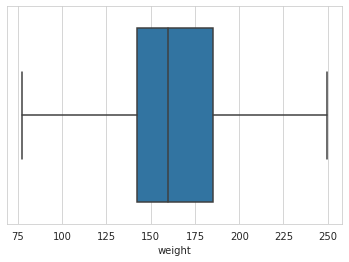

In [ ]:
#treating outliers for all different colums(Only weight colums has been considered as an outlier)
data = treat_outliers(cData,'weight')

# visualizing the column after outlier treatment
sns.boxplot(data=cData,x='weight')
plt.show()

**Preparing data for modeling:**


In [ ]:
# brand_name column will be removed for prediction purposes
#cData = cData.drop(["brand_name"], axis=1) 
#brand_name field will be deleted latter since it is used in EDA after this section.
cData.head()

,brand_name,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price,os_Others,os_Windows,os_iOS
0,Honor,14.50,1,0,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100,0,0,0
1,Honor,17.30,1,1,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018,0,0,0
2,Honor,16.69,1,1,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631,0,0,0
3,Honor,25.50,1,1,13.0,8.0,64.0,6.0,7250.0,249.5,2020,345,5.135387,5.630961,0,0,0
4,Honor,15.32,1,0,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837,0,0,0


## EDA

In [ ]:
# getting dataframe with numeric only variables
df_numeric = ['screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram','battery', 'weight', 'days_used', 'normalized_used_price', 'normalized_new_price']

#ploting pairplot to check correlation between numerical variables
sns.pairplot(data=cData,diag_kind="kde")
print("\n\n")

plt.figure(figsize=(10,5))
sns.heatmap(cData.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

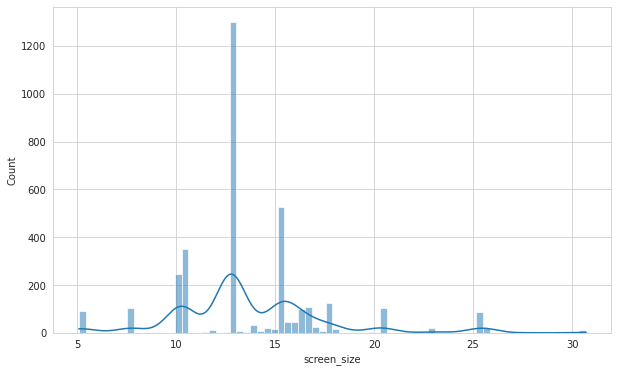

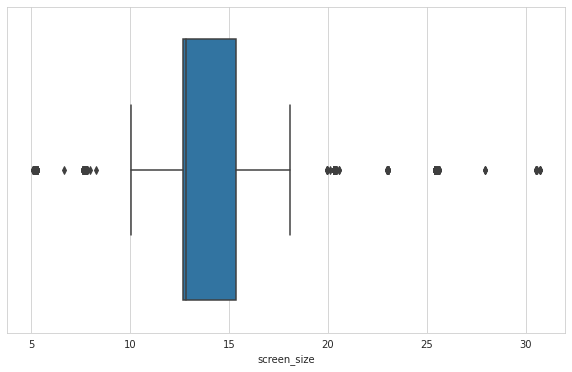

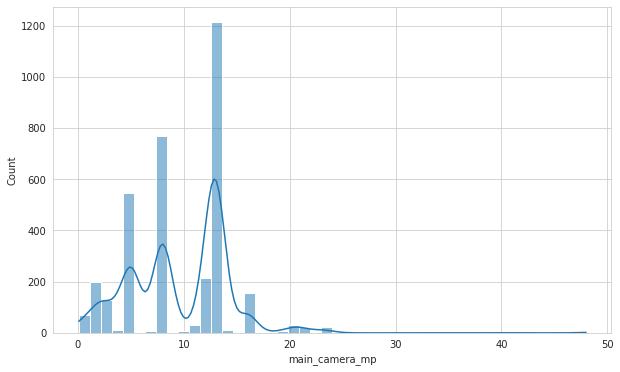

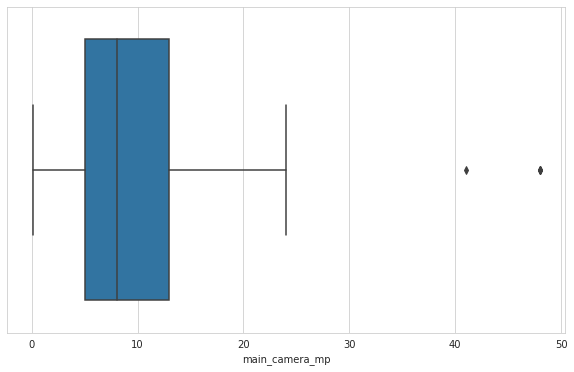

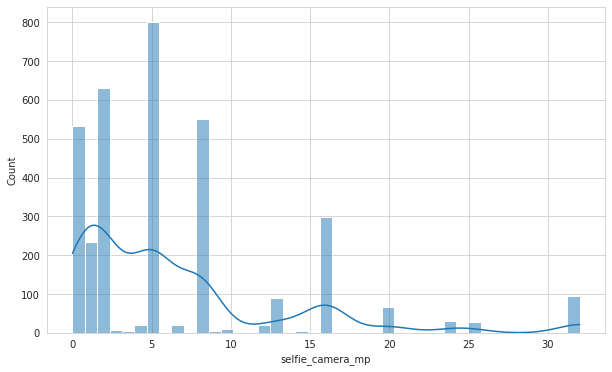

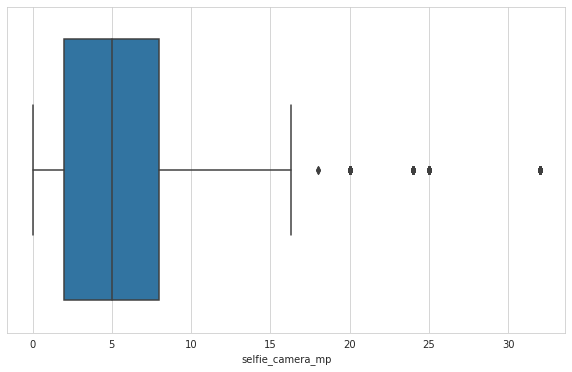

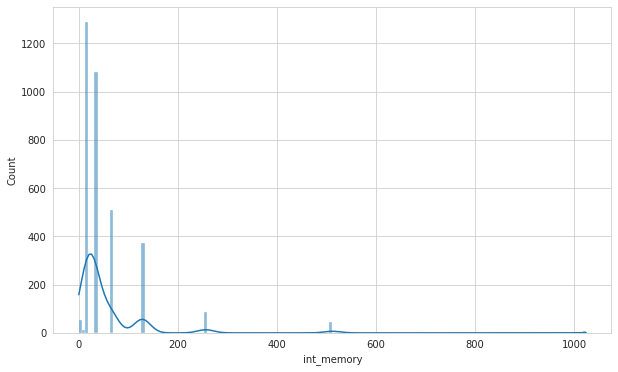

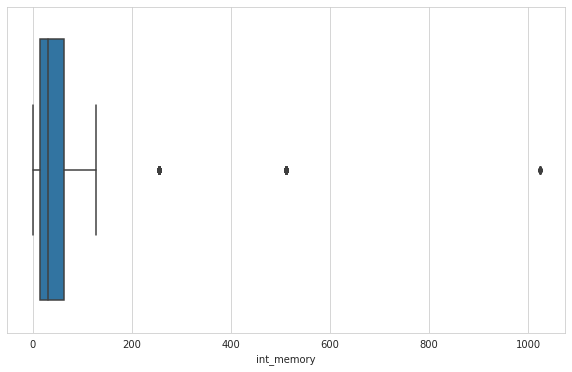

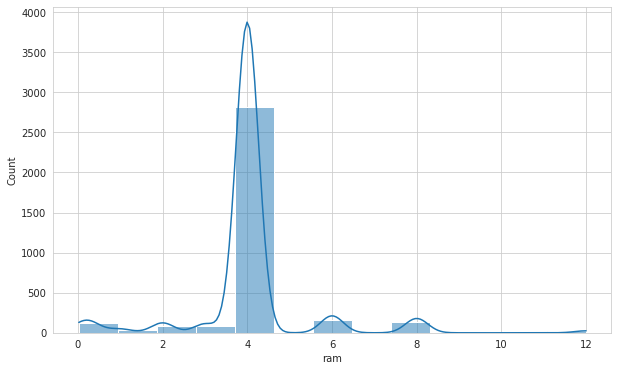

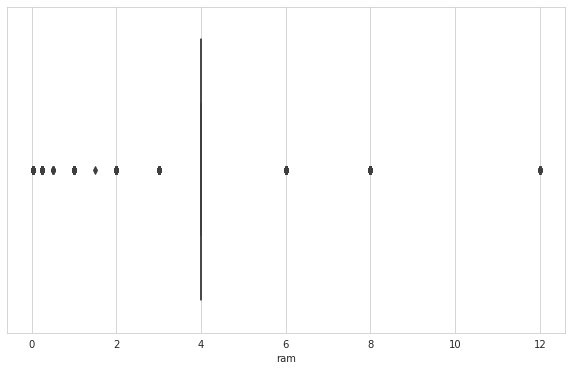

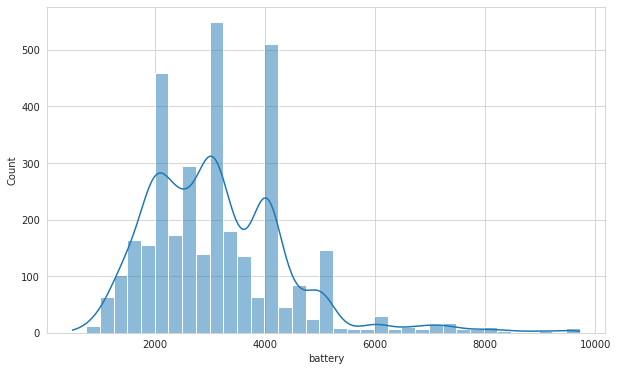

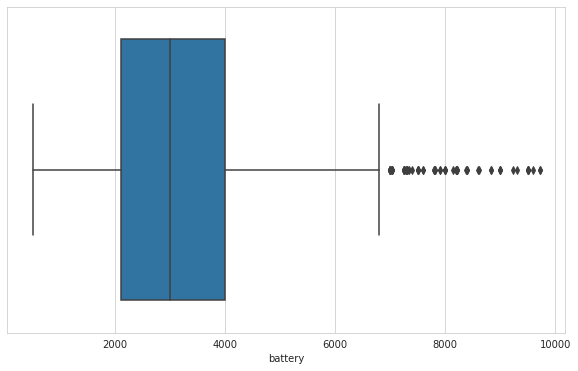

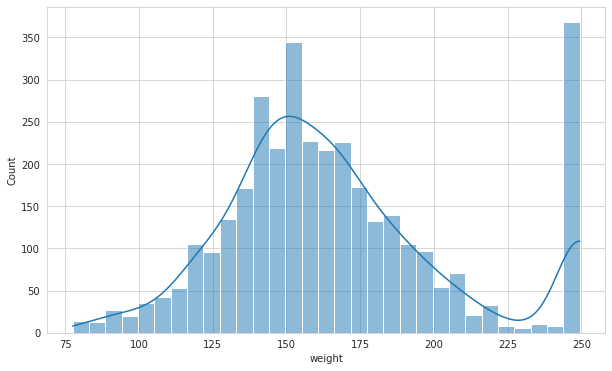

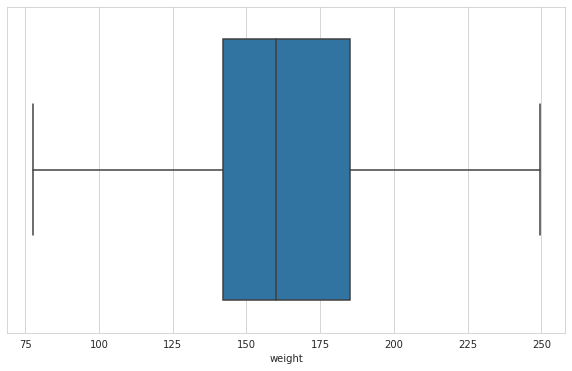

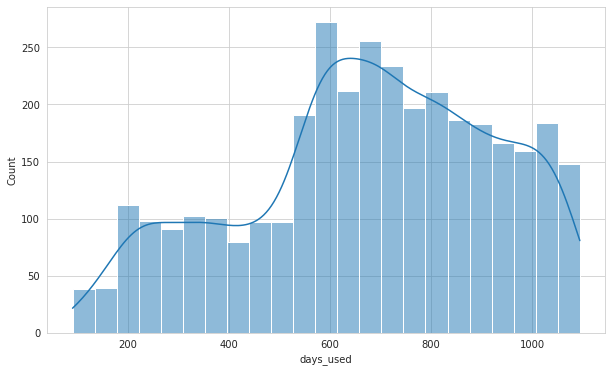

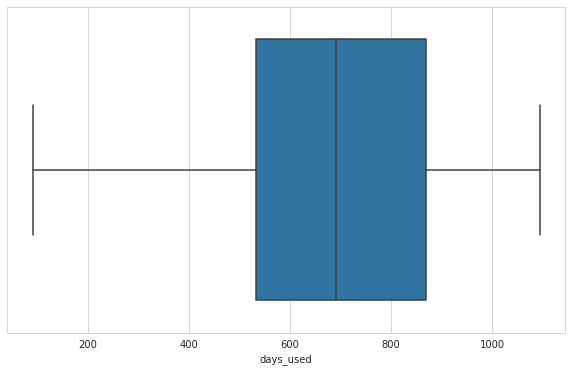

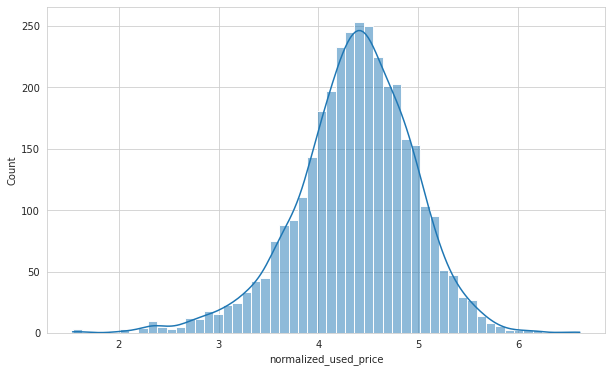

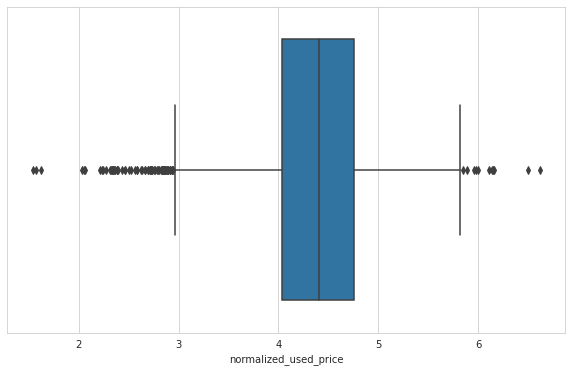

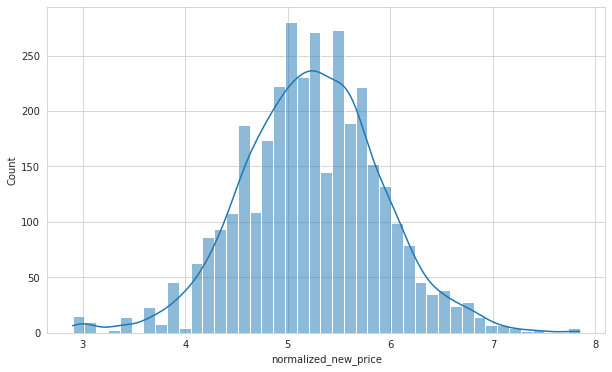

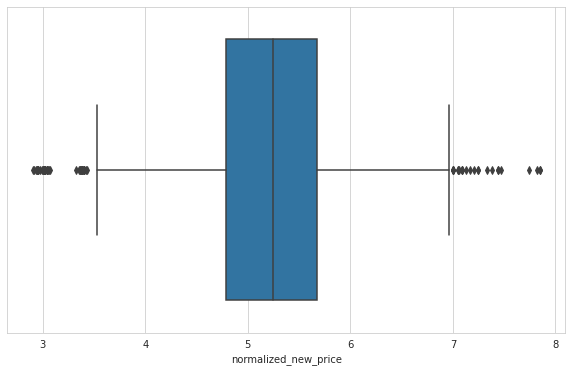

In [ ]:
#ploting a histogram with density curve for screen_size
plt.figure(figsize=(10,6));
sns.histplot(data=cData, x='screen_size', kde=True);
plt.show();
print("\n\n")

plt.figure(figsize=(10,6));
sns.boxplot(data=cData, x='screen_size');
plt.show();

#ploting a histogram with density curve for main_camera_mp
plt.figure(figsize=(10,6));
sns.histplot(data=cData, x='main_camera_mp', kde=True);
plt.show();
print("\n\n")

plt.figure(figsize=(10,6));
sns.boxplot(data=cData, x='main_camera_mp');
plt.show();

#ploting a histogram with density curve for selfie_camera_mp
plt.figure(figsize=(10,6));
sns.histplot(data=cData, x='selfie_camera_mp', kde=True);
plt.show();
print("\n\n")

plt.figure(figsize=(10,6));
sns.boxplot(data=cData, x='selfie_camera_mp');
plt.show();

#ploting a histogram with density curve for int_memory
plt.figure(figsize=(10,6));
sns.histplot(data=cData, x='int_memory', kde=True);
plt.show();
print("\n\n")

plt.figure(figsize=(10,6));
sns.boxplot(data=cData, x='int_memory');
plt.show();

#ploting a histogram with density curve for ram
plt.figure(figsize=(10,6));
sns.histplot(data=cData, x='ram', kde=True);
plt.show();
print("\n\n")

plt.figure(figsize=(10,6));
sns.boxplot(data=cData, x='ram');
plt.show();

#ploting a histogram with density curve for battery
plt.figure(figsize=(10,6));
sns.histplot(data=cData, x='battery', kde=True);
plt.show();
print("\n\n")

plt.figure(figsize=(10,6));
sns.boxplot(data=cData, x='battery');
plt.show();

#ploting a histogram with density curve for weight
plt.figure(figsize=(10,6));
sns.histplot(data=cData, x='weight', kde=True);
plt.show();
print("\n\n")

plt.figure(figsize=(10,6));
sns.boxplot(data=cData, x='weight');
plt.show();

#ploting a histogram with density curve for days_used
plt.figure(figsize=(10,6));
sns.histplot(data=cData, x='days_used', kde=True);
plt.show();
print("\n\n")

plt.figure(figsize=(10,6));
sns.boxplot(data=cData, x='days_used');
plt.show();

#ploting a histogram with density curve for normalized_used_price
plt.figure(figsize=(10,6));
sns.histplot(data=cData, x='normalized_used_price', kde=True);
plt.show();
print("\n\n")

plt.figure(figsize=(10,6));
sns.boxplot(data=cData, x='normalized_used_price');
plt.show();

#ploting a histogram with density curve for normalized_new_price
plt.figure(figsize=(10,6));
sns.histplot(data=cData, x='normalized_new_price', kde=True);
plt.show();
print("\n\n")

plt.figure(figsize=(10,6));
sns.boxplot(data=cData, x='normalized_new_price');
plt.show();

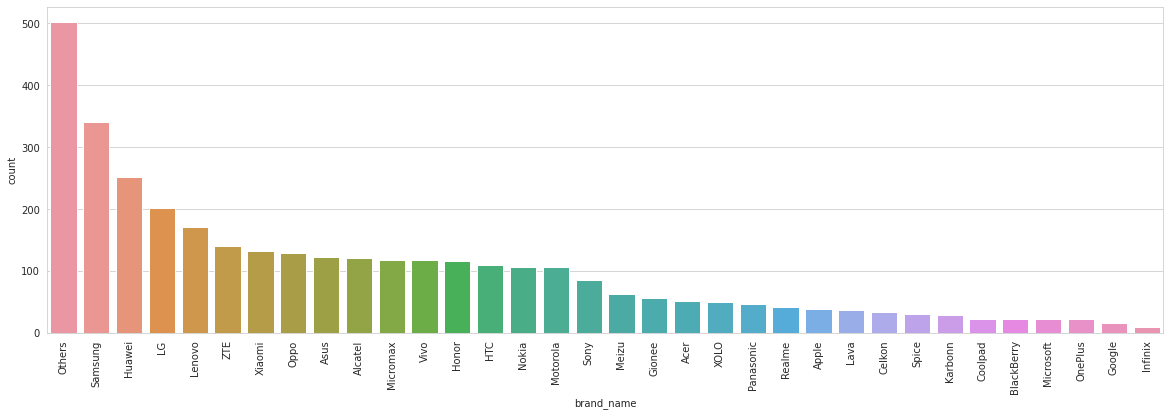

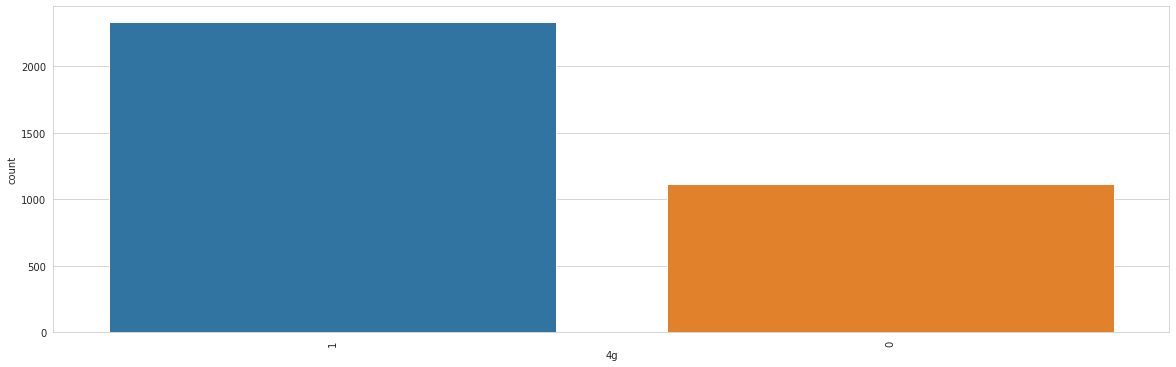

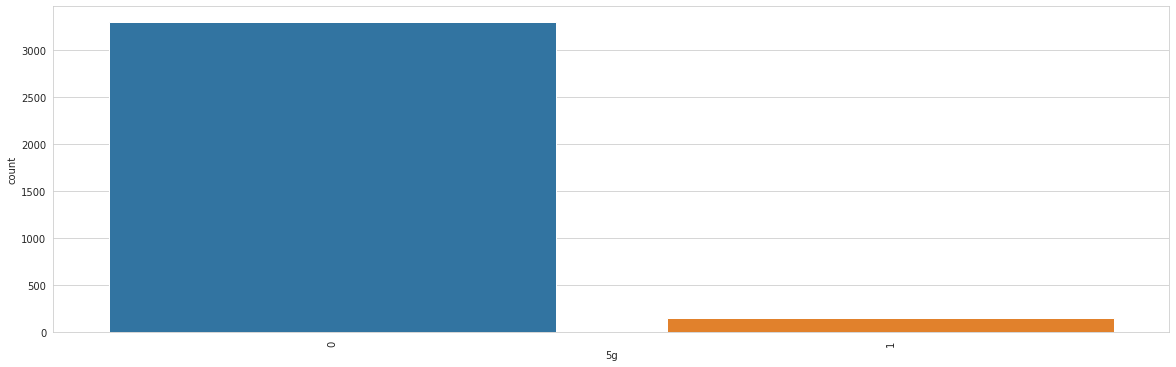

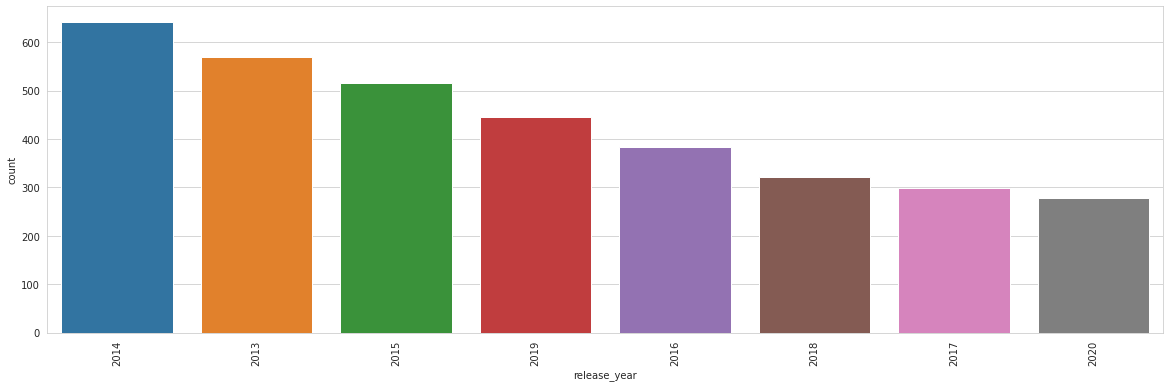

In [ ]:
#ploting a countplot for brand_name
plt.figure(figsize=(20,6));
sns.countplot(data=cData, x='brand_name', order=cData.brand_name.value_counts().iloc[:100].index);
plt.xticks(rotation=90)
plt.show();
print("\n\n")

#ploting a 4G
plt.figure(figsize=(20,6));
sns.countplot(data=cData, x='4g', order=cData['4g'].value_counts().iloc[:100].index);
plt.xticks(rotation=90)
plt.show();
print("\n\n")

#ploting a 5G
plt.figure(figsize=(20,6));
sns.countplot(data=cData, x='5g', order=cData['5g'].value_counts().iloc[:100].index);
plt.xticks(rotation=90)
plt.show();
print("\n\n")

#ploting a release_year
plt.figure(figsize=(20,6));
sns.countplot(data=cData, x='release_year', order=cData.release_year.value_counts().iloc[:100].index);
plt.xticks(rotation=90)
plt.show();

- It is a good idea to explore the data once again after manipulating it.

## Model Building - Linear Regression

In [ ]:
# brand_name column will be removed for prediction purposes
cData = cData.drop(["brand_name"], axis=1) 
cData.head()

#####################################################################################################
#Split the data
#####################################################################################################

# independent variables
X = cData.drop(["normalized_used_price"], axis=1)
# dependent variable
y = cData[["normalized_used_price"]]

In [ ]:
# let's add the intercept to data
X = sm.add_constant(X)

In [ ]:
X

,const,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_new_price,os_Others,os_Windows,os_iOS
0,1.0,14.50,1,0,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.715100,0,0,0
1,1.0,17.30,1,1,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.519018,0,0,0
2,1.0,16.69,1,1,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.884631,0,0,0
3,1.0,25.50,1,1,13.0,8.0,64.0,6.0,7250.0,249.5,2020,345,5.630961,0,0,0
4,1.0,15.32,1,0,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.947837,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,1.0,15.34,1,0,13.0,8.0,64.0,6.0,5000.0,190.0,2019,232,6.483872,0,0,0
3450,1.0,15.24,1,0,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,6.251538,0,0,0
3451,1.0,15.80,1,0,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.528829,0,0,0
3452,1.0,15.80,1,0,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.624188,0,0,0


In [ ]:
#spliting the data into train and test with a proportion 70% and 30% respectively
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

In [ ]:
print(X_train.head())

      const  screen_size  4g  5g  main_camera_mp  selfie_camera_mp  \
3026    1.0        10.29   0   0             8.0               0.3   
1525    1.0        15.34   1   0            13.0               5.0   
1128    1.0        12.70   0   0            13.0               5.0   
3003    1.0        12.83   1   0             8.0               5.0   
2907    1.0        12.88   1   0            13.0              16.0   

      int_memory  ram  battery  weight  release_year  days_used  \
3026        16.0  4.0   1800.0   120.0          2014        819   
1525        32.0  4.0   4050.0   225.0          2016        585   
1128        32.0  4.0   2550.0   162.0          2015        727   
3003        16.0  4.0   3200.0   126.0          2015        800   
2907        16.0  4.0   2900.0   160.0          2017        560   

      normalized_new_price  os_Others  os_Windows  os_iOS  
3026              4.796204          0           0       0  
1525              5.434595          0           0       

In [ ]:
print(X_test.head())

      const  screen_size  4g  5g  main_camera_mp  selfie_camera_mp  \
866     1.0        15.24   0   0            8.00               2.0   
957     1.0        10.16   0   0            3.15               0.3   
280     1.0        15.39   1   0           13.00               8.0   
2150    1.0        12.83   1   0           13.00              16.0   
93      1.0        15.29   1   0           13.00               5.0   

      int_memory   ram  battery  weight  release_year  days_used  \
866         16.0  4.00   3000.0   206.0          2014        632   
957        512.0  0.25   1400.0   140.0          2013        637   
280         32.0  2.00   5000.0   185.0          2020        329   
2150        64.0  4.00   3200.0   148.0          2017        648   
93          32.0  3.00   3500.0   179.0          2019        216   

      normalized_new_price  os_Others  os_Windows  os_iOS  
866               5.190788          0           0       0  
957               3.884652          0           0 

In [ ]:
#FIT Linear regression

olsmod = sm.OLS(y_train, X_train)
olsres = olsmod.fit()

In [ ]:
# let's print the regression summary
print(olsres.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.841
Method:                    Least Squares   F-statistic:                     855.6
Date:                   Sat, 18 Mar 2023   Prob (F-statistic):               0.00
Time:                           06:58:01   Log-Likelihood:                 104.71
No. Observations:                   2417   AIC:                            -177.4
Df Residuals:                       2401   BIC:                            -84.77
Df Model:                             15                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

**Observations:**

### Interpretation of R-squared

* The R-squared value of 0.842 tells us that our model can explain 84.2% of the variance in the training set.

## Model Performance Check

In [ ]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const                   3.459635e+06
screen_size             4.682294e+00
4g                      2.245798e+00
5g                      1.724274e+00
main_camera_mp          1.947566e+00
selfie_camera_mp        2.549722e+00
int_memory              1.248489e+00
ram                     2.099185e+00
battery                 3.686716e+00
weight                  3.402649e+00
release_year            4.466210e+00
days_used               2.563497e+00
normalized_new_price    2.649111e+00
os_Others               1.363540e+00
os_Windows              1.023565e+00
os_iOS                  1.081029e+00
dtype: float64



**Obsevations:**
As per all VIF values are less than 5 we can conclude that there is no collinearity

**since we do not have multicollinearity in our data, then the p-values of the our coefficients are reliable and we can remove the non-significant predictor variables.**

In [ ]:
# let's print the regression summary
print(olsres.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.841
Method:                    Least Squares   F-statistic:                     855.6
Date:                   Sat, 18 Mar 2023   Prob (F-statistic):               0.00
Time:                           06:58:01   Log-Likelihood:                 104.71
No. Observations:                   2417   AIC:                            -177.4
Df Residuals:                       2401   BIC:                            -84.77
Df Model:                             15                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

**As observed in the above model (olsres), 'os_Others' has a p-value greater than 0.05. So, we can drop it because it is not significant in predicting 'normalized_used_price'.**

In [ ]:
X_train1 = X_train.drop(["os_Others"], axis=1)
olsmod_10 = sm.OLS(y_train, X_train1)
olsres_10 = olsmod_10.fit()
print(olsres_10.summary())           

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.841
Method:                    Least Squares   F-statistic:                     917.1
Date:                   Sat, 18 Mar 2023   Prob (F-statistic):               0.00
Time:                           06:58:01   Log-Likelihood:                 104.69
No. Observations:                   2417   AIC:                            -179.4
Df Residuals:                       2402   BIC:                            -92.53
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
#we will also remove the os_iOS as next step and will continue deleting the next less significant if R-squared is not affected significantly
X_train2 = X_train1.drop(["os_iOS"], axis=1)
olsmod_10 = sm.OLS(y_train, X_train2)
olsres_10 = olsmod_10.fit()
print(olsres_10.summary())    

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     987.7
Date:                   Sat, 18 Mar 2023   Prob (F-statistic):               0.00
Time:                           06:58:01   Log-Likelihood:                 104.34
No. Observations:                   2417   AIC:                            -180.7
Df Residuals:                       2403   BIC:                            -99.61
Df Model:                             13                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
#we will also remove the os_Windows as next step and will continue deleting the next less significant if R-squared is not affected significantly
X_train3 = X_train2.drop(["os_Windows"], axis=1)
olsmod_10 = sm.OLS(y_train, X_train3)
olsres_10 = olsmod_10.fit()
print(olsres_10.summary())    

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.841
Method:                    Least Squares   F-statistic:                     1070.
Date:                   Sat, 18 Mar 2023   Prob (F-statistic):               0.00
Time:                           06:58:01   Log-Likelihood:                 103.67
No. Observations:                   2417   AIC:                            -181.3
Df Residuals:                       2404   BIC:                            -106.1
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
#we will also remove the int_memory as next step and will continue deleting the next less significant if R-squared is not affected significantly
X_train4 = X_train3.drop(["int_memory"], axis=1)
olsmod_10 = sm.OLS(y_train, X_train4)
olsres_10 = olsmod_10.fit()
print(olsres_10.summary()) 

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.841
Method:                    Least Squares   F-statistic:                     1166.
Date:                   Sat, 18 Mar 2023   Prob (F-statistic):               0.00
Time:                           06:58:01   Log-Likelihood:                 102.65
No. Observations:                   2417   AIC:                            -181.3
Df Residuals:                       2405   BIC:                            -111.8
Df Model:                             11                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
#we will also remove the battery as next step and will continue deleting the next less significant if R-squared is not affected significantly
X_train5 = X_train4.drop(["battery"], axis=1)
olsmod_10 = sm.OLS(y_train, X_train5)
olsres_10 = olsmod_10.fit()
print(olsres_10.summary()) 

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.841
Method:                    Least Squares   F-statistic:                     1282.
Date:                   Sat, 18 Mar 2023   Prob (F-statistic):               0.00
Time:                           06:58:01   Log-Likelihood:                 101.38
No. Observations:                   2417   AIC:                            -180.8
Df Residuals:                       2406   BIC:                            -117.1
Df Model:                             10                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
#we will also remove 5g as next step and will continue deleting the next less significant if R-squared is not affected significantly
X_train6 = X_train5.drop(["5g"], axis=1)
olsmod_10 = sm.OLS(y_train, X_train6)
olsres_10 = olsmod_10.fit()
print(olsres_10.summary()) 

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.841
Method:                    Least Squares   F-statistic:                     1423.
Date:                   Sat, 18 Mar 2023   Prob (F-statistic):               0.00
Time:                           06:58:01   Log-Likelihood:                 100.05
No. Observations:                   2417   AIC:                            -180.1
Df Residuals:                       2407   BIC:                            -122.2
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

###There are no more coefficients with P-Value > 0.05 so we are done deleting them

**After dropping the features causing strong multicollinearity and the statistically insignificant ones, our model performance hasn't dropped significantly (adj. R-squared stays the same since the beginning 0.842). This shows that these variables did not have much predictive power.**

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

In [ ]:
#getting actual and fitted values of the regression
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train.values.flatten()  # actual values
df_pred["Fitted Values"] = olsres_10.fittedvalues.values  # predicted values
df_pred["Residuals"] = olsres_10.resid.values  # residuals

df_pred.head()


,Actual Values,Fitted Values,Residuals
0,4.087488,3.833770,0.253718
1,4.448399,4.647142,-0.198742
2,4.315353,4.294518,0.020834
3,4.282068,4.204180,0.077889
4,4.456438,4.461389,-0.004951


### TEST FOR LINEARITY AND INDEPENDENCE

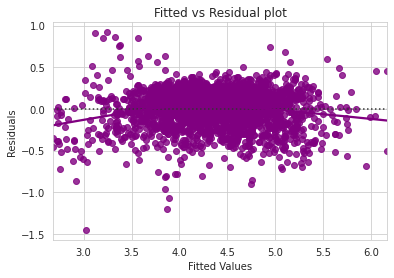

In [ ]:
# let us plot the fitted values vs residuals
sns.set_style("whitegrid")
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

**Observations:**
Since plot doesn't follow a pattern we can say that the model is linear

### TEST FOR NORMALITY

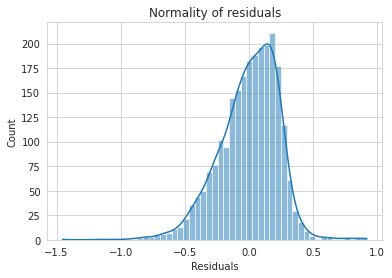

In [ ]:
sns.histplot(df_pred["Residuals"], kde=True)
plt.title("Normality of residuals")
plt.show()

**Observations:**
As per the histplot of residuals we can say that the model follow a normal distribution with a left skewed distribution

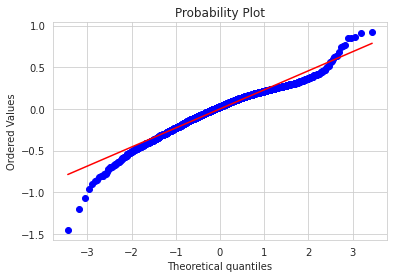

In [ ]:
#Priting QQ Plot
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

**Observations:**
As per the QQ Plot we can observe that most of the points fall in under the expected line

In [ ]:
#performing shapiro test
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9692786335945129, pvalue=2.470490716792278e-22)

**Observations:**
As per shapiro test since p-value is less than 0.05 then residuals are not normal

### TEST FOR HOMOSCEDASTICITY

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

In [ ]:
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train6)
lzip(name, test)

[('F statistic', 1.0766038911703566), ('p-value', 0.10075572988341945)]

In [ ]:
test

(1.0766038911703566, 0.10075572988341945, 'increasing')

* Since p-value > 0.05 we can say that the residuals are homoscedastic.

### All the assumptions of linear regression are now satisfied. Let's check the summary of our final model (olsres_10).

## Final Model

In [ ]:
print(olsres_10.summary())


                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.841
Method:                    Least Squares   F-statistic:                     1423.
Date:                   Sat, 18 Mar 2023   Prob (F-statistic):               0.00
Time:                           06:58:03   Log-Likelihood:                 100.05
No. Observations:                   2417   AIC:                            -180.1
Df Residuals:                       2407   BIC:                            -122.2
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

## Actionable Insights and Recommendations 

- 


___